# **Big - Mart Sales**

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing Datasets

train = pd.read_csv('/content/AV_Big_Mart_Sales_Prediction_Train.csv')
test = pd.read_csv('/content/AV_Big_Mart_Sales_Prediction_Test.csv')
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
train['source']='train'
test['source']='test'

In [ ]:
data =  pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,FDX46,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765,NaN,NaN,NaN,12.7929,4.6525,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204,NaN,NaN,NaN,0.0659528,0.0514586,0,0.0270357,0.0540205,0.0940373,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204,NaN,NaN,NaN,141.005,62.0869,31.29,94.012,142.247,185.856,266.888
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204,NaN,NaN,NaN,1997.83,8.37166,1985,1987,1999,2004,2009
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Imputing Values**

In [ ]:
from scipy.stats import mode

item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
miss_bool = data['Item_Weight'].isnull() 
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
miss_bool = (data['Item_Visibility'] == 0)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

In [ ]:
# Categorical Variables

cat_var = data.select_dtypes('object').columns
cat_var = cat_var.drop('Item_Identifier')

for i in cat_var:
  print("********************NEW********************")
  print(f"{i}")
  print(data[i].value_counts())

********************NEW********************
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
********************NEW********************
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
********************NEW********************
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
********

## **Feature Engineering**

In [ ]:
data['Item_Identifier_Type'] = data['Item_Identifier'].apply(lambda x : x[:2])
data['Item_Identifier_Type_Number'] = data['Item_Identifier'].apply(lambda x : int(x[-2:]))
data['Outlet_Identifier_Number'] = data['Outlet_Identifier'].apply(lambda x : x[-3:])

## **Data Preprocessing**

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                             'low fat' : 'Low Fat',
                                                             'reg' : 'Regular'})

data.loc[data['Item_Identifier_Type']=="NC",'Item_Fat_Content'] = "Non Consumable"

data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

## **Categorical to Continuous**

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat' : 0,
                                                         'Regular' : 1,
                                                         'Non Consumable' : 2})

data['Item_Type'] = data['Item_Type'].map({'Fruits and Vegetables' : 0,
                                           'Snack Foods' : 1,
                                           'Household' : 2,
                                           'Frozen Foods' : 3,
                                           'Dairy' : 4,
                                           'Baking Goods' : 5,
                                           'Canned' : 6,
                                           'Health and Hygiene' : 7,
                                           'Meat' : 8,
                                           'Soft Drinks' : 9,
                                           'Breads' : 10,
                                           'Hard Drinks' : 11,
                                           'Others' : 12,
                                           'Starchy Foods' : 13,
                                           'Breakfast' : 14,
                                           'Seafood' : 15})

data['Outlet_Size'] = data['Outlet_Size'].map({'Small' : 0,
                                               'Medium' : 1,
                                               'High' : 2})

data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1' : 0,
                                                                 'Tier 2' : 1,
                                                                 'Tier 3' : 2})

data['Outlet_Type'] = data['Outlet_Type'].map({'Grocery Store' : 0,
                                               'Supermarket Type1' : 1,
                                               'Supermarket Type2' : 2,
                                               'Supermarket Type3' : 3})

data['Item_Identifier_Type'] = data['Item_Identifier_Type'].map({'FD' : 0,
                                                                 'NC' : 1,
                                                                 'DR' : 2})

data['Item_Identifier_Type_Number'] = data['Item_Identifier_Type_Number'].apply(lambda x : int(x))
data['Outlet_Identifier_Number'] = data['Outlet_Identifier_Number'].apply(lambda x : int(x))

In [ ]:
# Final Datatypes

data.dtypes

Item_Identifier                 object
Item_Weight                    float64
Item_Fat_Content                 int64
Item_Visibility                float64
Item_Type                        int64
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                      int64
Outlet_Location_Type             int64
Outlet_Type                      int64
Item_Outlet_Sales              float64
source                          object
Item_Identifier_Type             int64
Item_Identifier_Type_Number      int64
Outlet_Identifier_Number         int64
Outlet_Age                       int64
dtype: object

In [ ]:
# Final Dataset

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_Type,Item_Identifier_Type_Number,Outlet_Identifier_Number,Outlet_Age
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,train,0,15,49,14
1,DRC01,5.92,1,0.019278,9,48.2692,OUT018,1,2,2,443.4228,train,2,1,18,4
2,FDN15,17.50,0,0.016760,8,141.6180,OUT049,1,0,1,2097.2700,train,0,15,49,14
3,FDX07,19.20,1,0.017834,0,182.0950,OUT010,0,2,0,732.3800,train,0,7,10,15
4,NCD19,8.93,2,0.009780,2,53.8614,OUT013,2,2,1,994.7052,train,1,19,13,26


## **Visualising Data**

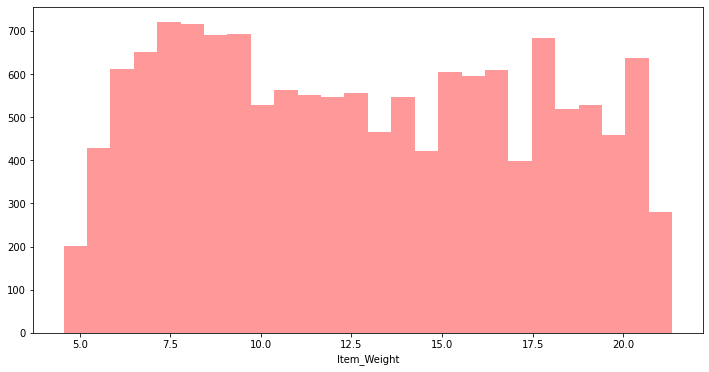

In [ ]:
plt.figure(figsize = (12, 6))
sns.distplot(data['Item_Weight'], kde = False, color = 'r')

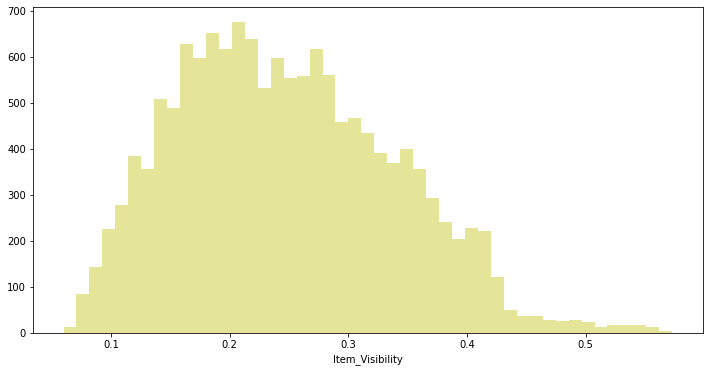

In [ ]:
plt.figure(figsize = (12, 6))
sns.distplot(np.sqrt(data['Item_Visibility']), kde = False, color = 'y')

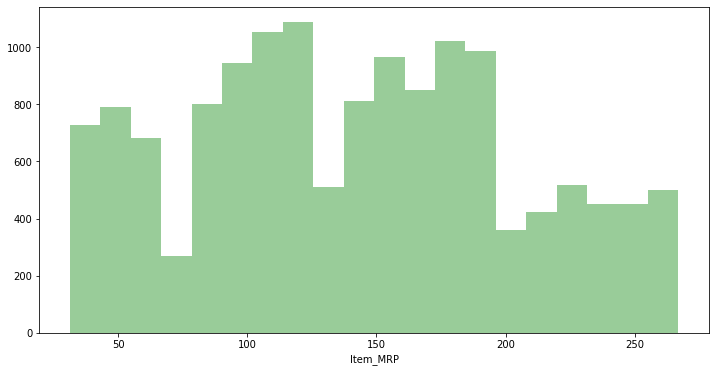

In [ ]:
plt.figure(figsize = (12, 6))
sns.distplot(data['Item_MRP'], kde = False, color = 'g', bins = 20)

In [ ]:
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

## **Train - Test Split**

In [ ]:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

train.drop(['source'],axis = 1,inplace = True)
test.drop(['Item_Outlet_Sales', 'source'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## **Features and Target Variables**

In [ ]:
features = train.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis = 1).columns
target = 'Item_Outlet_Sales'
ID = ['Item_Identifier', 'Outlet_Identifier']

## **User - Defined Model Creation Function**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def My_model(model, M_train, features, target):

    model.fit(M_train[features], M_train[target])
        

    M_train_predictions = model.predict(M_train[features])


    cv_score = cross_val_score(model, M_train[features], M_train[target], cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    

    print("\nModel Performance")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(M_train[target].values, M_train_predictions)))
    print("CV Score : Mean Score - %.4g | Std Score - %.4g | Min Score - %.4g | Max Score - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

## **Importing and Checking Performance of Model**

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(max_depth = 7, learning_rate = 0.02, n_estimators = 700,
                    reg_alpha = 2, reg_lambda = 2, colsample_bytree = 0.90, random_state = 17)

My_model(lgb, train, features, target)


Model Performance
RMSE : 896.7
CV Score : Mean Score - 0.7586 | Std Score - 0.02791 | Min Score - 0.6868 | Max Score - 0.7945


## **Training and Generating Predictions**

In [ ]:
lgb.fit(train[features], train[target])

my_pred = lgb.predict(test.drop(['Outlet_Identifier', 'Item_Identifier'], axis = 1))

In [ ]:
pred = pd.DataFrame({ x: test[x] for x in ID})
pred['Item_Outlet_Sales'] = my_pred

pred['Item_Outlet_Sales'].describe()

count    5681.000000
mean     2179.651547
std      1359.090682
min      -228.817898
25%      1070.326770
50%      2084.084160
75%      3043.506808
max      7818.373719
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# As the Minimum Value is Negative - Changing to Positive

for i in range(len(pred)):
  if  my_pred[i] > 0:
    pass
  else:
    my_pred[i] = (-1 * my_pred[i])

pred['Item_Outlet_Sales'] = my_pred

## **Saving Predictions**

In [ ]:
pred.to_csv('AV_Big_Mart_Sales_Prediction.csv', index = False)